In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
data_dir = r"C:\Users\Swastik\Desktop\Dono Consulting\Deloitte_Training\decision-tree"
os.chdir(data_dir)

In [3]:
data = pd.read_csv('credit_history.csv')

In [4]:
data.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,B,2.0,RENT,19200.0,24
1,1,6500,A,2.0,MORTGAGE,66000.0,28
2,0,2400,A,2.0,RENT,60000.0,36
3,0,10000,C,3.0,RENT,62000.0,24
4,1,4000,C,2.0,RENT,20000.0,28


In [5]:
data.isnull().sum()

default        0
amount         0
grade          0
years        279
ownership      0
income         0
age            0
dtype: int64

In [6]:
data.shape

(7727, 7)

In [7]:
data['years'].describe()

count    7448.000000
mean        6.086332
std         6.700758
min         0.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        62.000000
Name: years, dtype: float64

In [8]:
data['years'].fillna(4, inplace=True)

In [10]:
X = data.drop('default', axis=1)

In [11]:
y = data['default']

In [12]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: default, dtype: int64

In [13]:
X.head()

,amount,grade,years,ownership,income,age
0,1000,B,2.0,RENT,19200.0,24
1,6500,A,2.0,MORTGAGE,66000.0,28
2,2400,A,2.0,RENT,60000.0,36
3,10000,C,3.0,RENT,62000.0,24
4,4000,C,2.0,RENT,20000.0,28


In [14]:
X = pd.get_dummies(X)

In [15]:
X.head()

,amount,years,income,age,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,ownership_MORTGAGE,ownership_OTHER,ownership_OWN,ownership_RENT
0,1000,2.0,19200.0,24,0,1,0,0,0,0,0,0,0,0,1
1,6500,2.0,66000.0,28,1,0,0,0,0,0,0,1,0,0,0
2,2400,2.0,60000.0,36,1,0,0,0,0,0,0,0,0,0,1
3,10000,3.0,62000.0,24,0,0,1,0,0,0,0,0,0,0,1
4,4000,2.0,20000.0,28,0,0,1,0,0,0,0,0,0,0,1


In [16]:
import sklearn.model_selection as model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
import sklearn.tree as tree

In [29]:
clf = tree.DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.628072445019405

In [19]:
clf.predict_proba(X_test)

array([[0.86821705, 0.13178295],
       [0.6977492 , 0.3022508 ],
       [0.50933786, 0.49066214],
       ...,
       [0.32019704, 0.67980296],
       [0.6       , 0.4       ],
       [0.64046392, 0.35953608]])

In [30]:
import sklearn.metrics as metrics
metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

0.6678748031852548

In [ ]:
!pip install graphviz

In [22]:
import pydotplus
import graphviz

In [31]:
os.environ['PATH'] += os.pathsep + 'C:/Program Files/Graphviz/bin'

In [32]:
dot_data = tree.export_graphviz(clf, out_file=None,
                               feature_names=X.columns,
                               class_names=['Not Default','Default'],
                               filled=True, rounded=True,
                               special_characters=True, proportion=True)

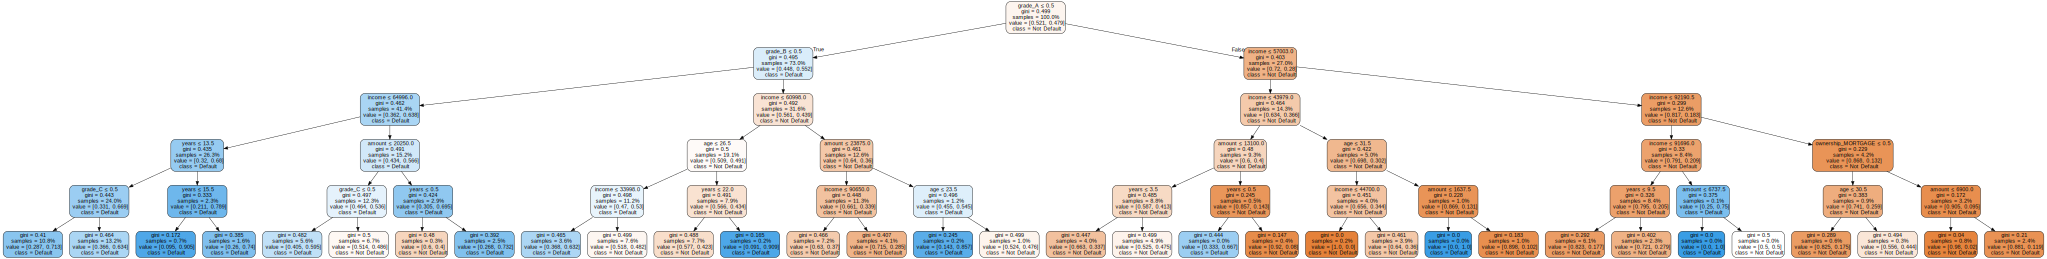

In [33]:
graph = graphviz.Source(dot_data, format='png')
graph

In [34]:
graph.render('dt_classifier', view=True)

'dt_classifier.png'

In [35]:
clf = tree.DecisionTreeClassifier(max_depth=3, random_state=42)

In [39]:
# mod = model_selection.GridSearchCV(clf, param_grid = {'max_depth':[2,3,4,5,6],
#                                                      'max_features':['sqrt', 'log2'],
#                                                      'min_samples_split':[0.05,0.10]})

mod = model_selection.GridSearchCV(clf, param_grid = {'max_depth':[2,3,4,5,6,7]})

mod.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3, random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7]})

In [40]:
mod.best_estimator_

DecisionTreeClassifier(max_depth=2, random_state=42)

In [41]:
mod.best_score_

0.6358188591775175

In [42]:
mod.score(X_test, y_test)

0.6144890038809832

In [43]:
dat = pd.read_csv('dm.csv')

In [44]:
dat.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151


In [45]:
X = dat.drop(['Cust_Id','AmountSpent'], axis=1)

In [46]:
X.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs
0,Old,Female,Own,Single,Far,47500,0,High,6
1,Middle,Male,Rent,Single,Close,63600,0,High,6
2,Young,Female,Rent,Single,Close,13500,0,Low,18
3,Middle,Male,Own,Married,Close,85600,1,High,18
4,Middle,Female,Own,Single,Close,68400,0,High,12


In [48]:
y = dat['AmountSpent']

In [49]:
y.head()

0     755
1    1318
2     296
3    2436
4    1304
Name: AmountSpent, dtype: int64

In [50]:
X = pd.get_dummies(X)

In [51]:
X.head()

,Salary,Children,Catalogs,Age_Middle,Age_Old,Age_Young,Gender_Female,Gender_Male,OwnHome_Own,OwnHome_Rent,Married_Married,Married_Single,Location_Close,Location_Far,History_High,History_Low,History_Medium
0,47500,0,6,0,1,0,1,0,1,0,0,1,0,1,1,0,0
1,63600,0,6,1,0,0,0,1,0,1,0,1,1,0,1,0,0
2,13500,0,18,0,0,1,1,0,0,1,0,1,1,0,0,1,0
3,85600,1,18,1,0,0,0,1,1,0,1,0,1,0,1,0,0
4,68400,0,12,1,0,0,1,0,1,0,0,1,1,0,1,0,0


In [52]:
X.columns

Index(['Salary', 'Children', 'Catalogs', 'Age_Middle', 'Age_Old', 'Age_Young',
       'Gender_Female', 'Gender_Male', 'OwnHome_Own', 'OwnHome_Rent',
       'Married_Married', 'Married_Single', 'Location_Close', 'Location_Far',
       'History_High', 'History_Low', 'History_Medium'],
      dtype='object')

In [53]:
X = X.drop(['Gender_Male','OwnHome_Own','Married_Single','Location_Far'], axis=1)

In [54]:
X.head()

,Salary,Children,Catalogs,Age_Middle,Age_Old,Age_Young,Gender_Female,OwnHome_Rent,Married_Married,Location_Close,History_High,History_Low,History_Medium
0,47500,0,6,0,1,0,1,0,0,0,1,0,0
1,63600,0,6,1,0,0,0,1,0,1,1,0,0
2,13500,0,18,0,0,1,1,1,0,1,0,1,0
3,85600,1,18,1,0,0,0,0,1,1,1,0,0
4,68400,0,12,1,0,0,1,0,0,1,1,0,0


In [55]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=200)

In [82]:
reg = tree.DecisionTreeRegressor(max_depth=4)
reg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4)

In [83]:
reg.score(X_test, y_test)

0.6634882283053326

In [84]:
reg.feature_importances_

array([0.65313755, 0.        , 0.16573856, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03270813, 0.06257607, 0.08583969])

In [85]:
pd.Series(reg.feature_importances_, index=X.columns).sort_values(ascending=False).head(5)

Salary            0.653138
Catalogs          0.165739
History_Medium    0.085840
History_Low       0.062576
History_High      0.032708
dtype: float64

In [87]:
dot_data = tree.export_graphviz(reg, out_file=None,
                               feature_names=X.columns,
                               filled=True, rounded=True,
                               special_characters=True, proportion=True)

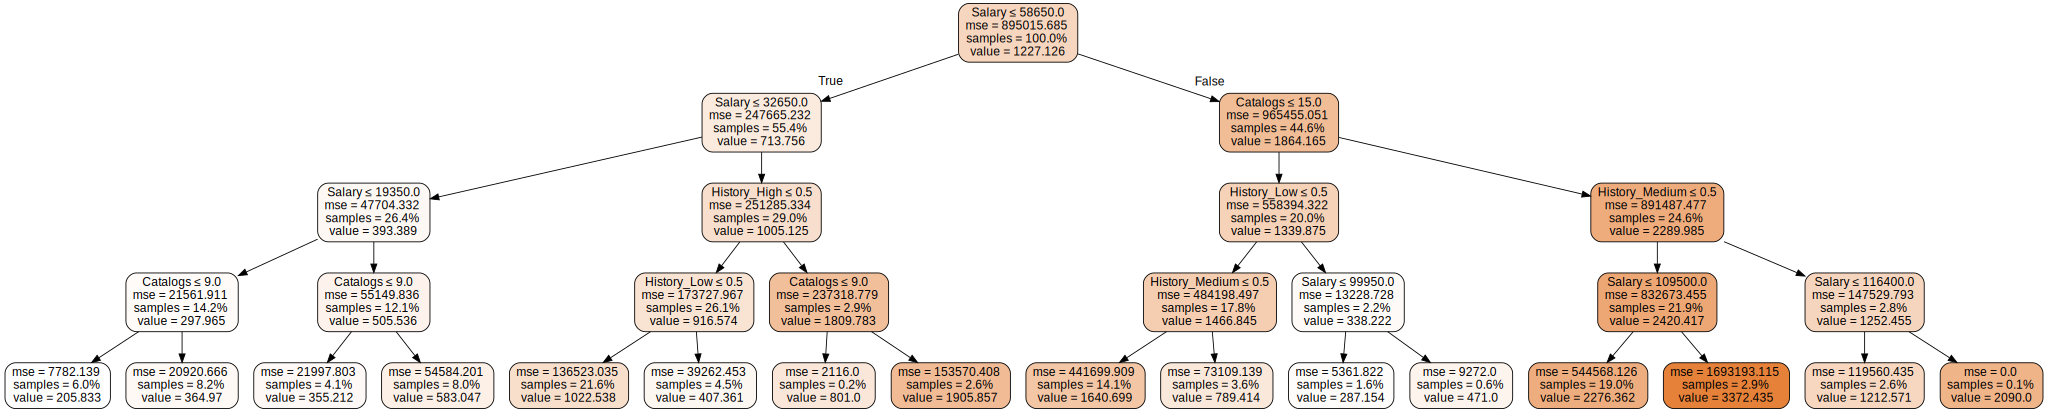

In [88]:
graph = graphviz.Source(dot_data, format='png')
graph

In [89]:
graph.render('dt_regressor', view=True)

'dt_regressor.png'

In [91]:
data_dir = r'C:\Users\Swastik\Desktop\Dono Consulting\Deloitte_Training\ensemble'

In [92]:
os.chdir(data_dir)

In [93]:
hr_data = pd.read_csv('HR_comma_sep.csv')

In [94]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [95]:
hr_data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [96]:
hr_data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [97]:
hr_data['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [98]:
hr_data['number_project'].unique()

array([2, 5, 7, 6, 4, 3], dtype=int64)

In [99]:
hr_data['Work_accident'].unique()

array([0, 1], dtype=int64)

In [100]:
hr_data['left'].unique()

array([1, 0], dtype=int64)

In [101]:
hr_data['promotion_last_5years'].unique()

array([0, 1], dtype=int64)

In [102]:
hr_data['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [107]:
hr_data.rename(columns={'sales':'deptt'}, inplace=True)

In [108]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,deptt,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [109]:
X = hr_data.drop('left', axis=1)
y = hr_data['left']

In [110]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,deptt,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


In [111]:
X = pd.get_dummies(X)

In [112]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,deptt_IT,deptt_RandD,deptt_accounting,deptt_hr,deptt_management,deptt_marketing,deptt_product_mng,deptt_sales,deptt_support,deptt_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [113]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=400)

In [114]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [117]:
clf = BaggingClassifier(oob_score=True, n_jobs=-1, n_estimators=20, base_estimator=DecisionTreeClassifier(), random_state=400)

In [118]:
clf.fit(X_train, y_train)

C:\Users\Swastik\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:640: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Swastik\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:644: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = (predictions /


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=20,
                  n_jobs=-1, oob_score=True, random_state=400)

In [119]:
clf.oob_score_

0.987415617968164

In [120]:
clf.score(X_test, y_test)

0.986

In [121]:
X_test.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,deptt_IT,deptt_RandD,deptt_accounting,deptt_hr,deptt_management,deptt_marketing,deptt_product_mng,deptt_sales,deptt_support,deptt_technical,salary_high,salary_low,salary_medium
6792,0.89,0.66,3,272,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
14398,0.40,0.46,2,143,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
7902,0.64,0.78,5,200,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
7843,0.59,0.50,3,199,2,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3959,0.81,0.75,5,170,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [122]:
y_test.head()

6792     0
14398    1
7902     0
7843     0
3959     0
Name: left, dtype: int64

In [127]:
for w in range(10,300,20):
    clf = BaggingClassifier(oob_score=True, n_jobs=-1, n_estimators=w, 
                            base_estimator=DecisionTreeClassifier(), random_state=400)
    clf.fit(X_train, y_train)
    oob = clf.oob_score_
    print('For base learners = ' + str(w))
    print('OOB score is ' + str(oob))
    print('***************************')

C:\Users\Swastik\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:640: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Swastik\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:644: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = (predictions /


For base learners = 10
OOB score is 0.9830819234936244
***************************
For base learners = 30
OOB score is 0.9884990415867989
***************************
For base learners = 50
OOB score is 0.9892491040920076
***************************
For base learners = 70
OOB score is 0.9895824652054338
***************************
For base learners = 90
OOB score is 0.990082506875573
***************************
For base learners = 110
OOB score is 0.990082506875573
***************************
For base learners = 130
OOB score is 0.9903325277106425
***************************
For base learners = 150
OOB score is 0.990415867988999
***************************
For base learners = 170
OOB score is 0.9902491874322861
***************************
For base learners = 190
OOB score is 0.9901658471539295
***************************
For base learners = 210
OOB score is 0.9902491874322861
***************************
For base learners = 230
OOB score is 0.9902491874322861
***************************


In [128]:
clf = BaggingClassifier(oob_score=True, n_jobs=-1, n_estimators=150, 
                        base_estimator=DecisionTreeClassifier(), random_state=400)

clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=150,
                  n_jobs=-1, oob_score=True, random_state=400)

In [129]:
clf.score(X_test,y_test)

0.9893333333333333

In [130]:
clf.estimators_

[DecisionTreeClassifier(random_state=1859118377),
 DecisionTreeClassifier(random_state=1559503733),
 DecisionTreeClassifier(random_state=1714796222),
 DecisionTreeClassifier(random_state=1907120008),
 DecisionTreeClassifier(random_state=2074988447),
 DecisionTreeClassifier(random_state=270530007),
 DecisionTreeClassifier(random_state=494610195),
 DecisionTreeClassifier(random_state=914653141),
 DecisionTreeClassifier(random_state=1249763274),
 DecisionTreeClassifier(random_state=1698305238),
 DecisionTreeClassifier(random_state=764038977),
 DecisionTreeClassifier(random_state=554023484),
 DecisionTreeClassifier(random_state=980045649),
 DecisionTreeClassifier(random_state=618787335),
 DecisionTreeClassifier(random_state=1478338621),
 DecisionTreeClassifier(random_state=878522688),
 DecisionTreeClassifier(random_state=1479530151),
 DecisionTreeClassifier(random_state=529095905),
 DecisionTreeClassifier(random_state=1322465795),
 DecisionTreeClassifier(random_state=2138769912),
 Decision

In [132]:
clf.estimators_[0].feature_importances_

array([5.05132052e-01, 1.32278580e-01, 1.09549979e-01, 7.25546688e-02,
       1.56255590e-01, 9.77054732e-04, 3.25242845e-04, 9.23910569e-04,
       1.08261950e-03, 2.53629992e-03, 4.89557936e-04, 1.25108377e-03,
       8.91966484e-04, 8.15148799e-04, 2.43313148e-03, 2.96579677e-03,
       3.16560556e-03, 5.68974302e-04, 4.97063874e-03, 8.32099901e-04])

In [133]:
imp=[]
for i in clf.estimators_:
    imp.append(i.feature_importances_)

In [134]:
imp

[array([5.05132052e-01, 1.32278580e-01, 1.09549979e-01, 7.25546688e-02,
        1.56255590e-01, 9.77054732e-04, 3.25242845e-04, 9.23910569e-04,
        1.08261950e-03, 2.53629992e-03, 4.89557936e-04, 1.25108377e-03,
        8.91966484e-04, 8.15148799e-04, 2.43313148e-03, 2.96579677e-03,
        3.16560556e-03, 5.68974302e-04, 4.97063874e-03, 8.32099901e-04]),
 array([3.86864908e-01, 1.65497880e-01, 2.19807061e-01, 7.86005696e-02,
        1.28854285e-01, 2.42813434e-03, 7.57130099e-06, 6.03048998e-04,
        0.00000000e+00, 1.37024526e-03, 6.56585426e-04, 1.12741732e-04,
        1.44226767e-03, 5.84106267e-04, 1.61694260e-03, 3.32979477e-03,
        3.21225805e-03, 1.66973547e-03, 1.98301782e-03, 1.35884640e-03]),
 array([4.94743838e-01, 1.16596241e-01, 1.12440173e-01, 1.18832715e-01,
        1.39236397e-01, 3.04444311e-04, 1.98000577e-05, 0.00000000e+00,
        0.00000000e+00, 1.69520128e-03, 6.69825401e-04, 2.86088110e-04,
        2.33727053e-04, 8.47122483e-05, 1.29834325e-03, 4.83

In [135]:
imp_avg = np.mean(imp, axis=0)

In [136]:
imp_avg

array([4.94406926e-01, 1.37858036e-01, 1.10367384e-01, 9.75657099e-02,
       1.37457774e-01, 1.56322822e-03, 1.65693351e-04, 1.55038378e-03,
       6.43746754e-04, 1.39149484e-03, 5.78268029e-04, 4.88292739e-04,
       7.13635750e-04, 6.52154411e-04, 2.54031558e-03, 2.83330926e-03,
       3.14726578e-03, 8.87796128e-04, 3.08386681e-03, 2.10471855e-03])

In [137]:
feature_importance = pd.Series(imp_avg, index=X.columns.tolist()).sort_values(ascending=False)

In [138]:
feature_importance

satisfaction_level       0.494407
last_evaluation          0.137858
time_spend_company       0.137458
number_project           0.110367
average_montly_hours     0.097566
deptt_technical          0.003147
salary_low               0.003084
deptt_support            0.002833
deptt_sales              0.002540
salary_medium            0.002105
Work_accident            0.001563
deptt_IT                 0.001550
deptt_accounting         0.001391
salary_high              0.000888
deptt_marketing          0.000714
deptt_product_mng        0.000652
deptt_RandD              0.000644
deptt_hr                 0.000578
deptt_management         0.000488
promotion_last_5years    0.000166
dtype: float64

<AxesSubplot:>

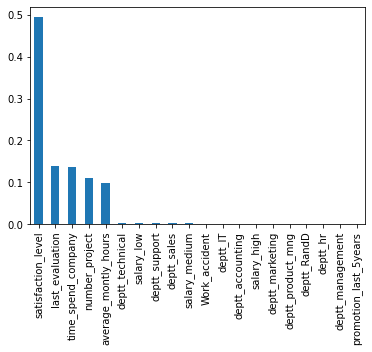

In [139]:
feature_importance.plot(kind='bar')

In [140]:
from sklearn.ensemble import RandomForestClassifier

In [142]:
clf = RandomForestClassifier(oob_score=True, n_jobs=-1, n_estimators=80, random_state=400)

In [143]:
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=80, n_jobs=-1, oob_score=True,
                       random_state=400)

In [144]:
clf.oob_score_

0.9905825485457121

In [145]:
clf.score(X_test, y_test)

0.9886666666666667

In [146]:
for w in range(10,300,20):
    clf = RandomForestClassifier(oob_score=True, n_jobs=-1, n_estimators=w, random_state=400)
    clf.fit(X_train, y_train)
    oob = clf.oob_score_
    print('For base learners = ' + str(w))
    print('OOB score is ' + str(oob))
    print('***************************')

C:\Users\Swastik\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Swastik\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


For base learners = 10
OOB score is 0.9832486040503375
***************************
For base learners = 30
OOB score is 0.9894991249270773
***************************
For base learners = 50
OOB score is 0.990082506875573
***************************
For base learners = 70
OOB score is 0.9905825485457121
***************************
For base learners = 90
OOB score is 0.9904992082673556
***************************
For base learners = 110
OOB score is 0.9908325693807817
***************************
For base learners = 130
OOB score is 0.9908325693807817
***************************
For base learners = 150
OOB score is 0.9905825485457121
***************************
For base learners = 170
OOB score is 0.9909992499374948
***************************
For base learners = 190
OOB score is 0.9909159096591382
***************************
For base learners = 210
OOB score is 0.9908325693807817
***************************
For base learners = 230
OOB score is 0.9908325693807817
**************************

In [151]:
clf = RandomForestClassifier(oob_score=True, n_jobs=-1, n_estimators=170, random_state=400)

clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=170, n_jobs=-1, oob_score=True,
                       random_state=400)

In [152]:
clf.score(X_test,y_test)

0.988

In [153]:
clf.feature_importances_

array([0.31240917, 0.12644956, 0.18351386, 0.15205451, 0.17567889,
       0.01014434, 0.00194301, 0.00183847, 0.00180132, 0.00171442,
       0.00173656, 0.00173706, 0.00121963, 0.00119858, 0.00352682,
       0.0029913 , 0.00366594, 0.00542278, 0.0073752 , 0.00357858])

In [154]:
feat_imp = pd.Series(clf.feature_importances_, index=X.columns.tolist()).sort_values(ascending=False)

In [156]:
feat_imp

satisfaction_level       0.312409
number_project           0.183514
time_spend_company       0.175679
average_montly_hours     0.152055
last_evaluation          0.126450
Work_accident            0.010144
salary_low               0.007375
salary_high              0.005423
deptt_technical          0.003666
salary_medium            0.003579
deptt_sales              0.003527
deptt_support            0.002991
promotion_last_5years    0.001943
deptt_IT                 0.001838
deptt_RandD              0.001801
deptt_management         0.001737
deptt_hr                 0.001737
deptt_accounting         0.001714
deptt_marketing          0.001220
deptt_product_mng        0.001199
dtype: float64

<AxesSubplot:>

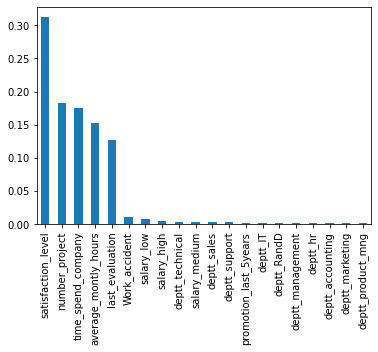

In [155]:
feat_imp.plot(kind='bar')

In [157]:
from sklearn.ensemble import GradientBoostingClassifier

In [158]:
clf = GradientBoostingClassifier(n_estimators=80, random_state=400)

In [159]:
clf.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=80, random_state=400)

In [160]:
clf.score(X_test, y_test)

0.974

In [162]:
from sklearn.model_selection import GridSearchCV

In [165]:
mod = GridSearchCV(clf, param_grid = {'n_estimators':[60,80,100,120,140,160]})

mod.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(n_estimators=80,
                                                  random_state=400),
             param_grid={'n_estimators': [60, 80, 100, 120, 140, 160]})

In [166]:
mod.best_estimator_

GradientBoostingClassifier(n_estimators=160, random_state=400)

In [167]:
clf = GradientBoostingClassifier(n_estimators=160, random_state=400)

clf.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=160, random_state=400)

In [168]:
clf.score(X_test, y_test)

0.9743333333333334

In [169]:
clf.feature_importances_

array([5.42605861e-01, 9.87507037e-02, 1.14253186e-01, 7.42086956e-02,
       1.66362150e-01, 1.11344127e-03, 1.06925506e-04, 1.01338047e-04,
       1.22387807e-04, 8.47228502e-05, 3.08801164e-05, 5.33784404e-05,
       0.00000000e+00, 8.99324385e-05, 7.99401343e-06, 9.34317188e-05,
       2.88849992e-04, 6.12687452e-04, 1.11282520e-03, 6.08032336e-07])

In [170]:
feat_imp = pd.Series(clf.feature_importances_, index=X.columns.tolist()).sort_values(ascending=False)

feat_imp

satisfaction_level       5.426059e-01
time_spend_company       1.663621e-01
number_project           1.142532e-01
last_evaluation          9.875070e-02
average_montly_hours     7.420870e-02
Work_accident            1.113441e-03
salary_low               1.112825e-03
salary_high              6.126875e-04
deptt_technical          2.888500e-04
deptt_RandD              1.223878e-04
promotion_last_5years    1.069255e-04
deptt_IT                 1.013380e-04
deptt_support            9.343172e-05
deptt_product_mng        8.993244e-05
deptt_accounting         8.472285e-05
deptt_management         5.337844e-05
deptt_hr                 3.088012e-05
deptt_sales              7.994013e-06
salary_medium            6.080323e-07
deptt_marketing          0.000000e+00
dtype: float64

In [171]:
from sklearn.ensemble import AdaBoostClassifier

In [174]:
clf = AdaBoostClassifier(n_estimators=80, random_state=400)

clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=80, random_state=400)

In [175]:
clf.score(X_test, y_test)

0.9553333333333334

In [179]:
mod = GridSearchCV(clf, param_grid = {'n_estimators':[60,80,100,120,140,160],
                                     'learning_rate':np.arange(0.1,1.1,0.3)})
mod.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(n_estimators=80, random_state=400),
             param_grid={'learning_rate': array([0.1, 0.4, 0.7, 1. ]),
                         'n_estimators': [60, 80, 100, 120, 140, 160]})

In [180]:
mod.best_estimator_

AdaBoostClassifier(learning_rate=0.4, n_estimators=140, random_state=400)

In [181]:
clf = AdaBoostClassifier(n_estimators=140, random_state=400, learning_rate=0.4)

clf.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.4, n_estimators=140, random_state=400)

In [182]:
clf.score(X_test, y_test)

0.9563333333333334

In [183]:
feat_imp = pd.Series(clf.feature_importances_, index=X.columns.tolist()).sort_values(ascending=False)

feat_imp

satisfaction_level       0.314286
average_montly_hours     0.171429
last_evaluation          0.142857
number_project           0.121429
time_spend_company       0.114286
Work_accident            0.028571
salary_high              0.028571
salary_low               0.021429
deptt_product_mng        0.014286
deptt_RandD              0.014286
deptt_technical          0.007143
deptt_hr                 0.007143
deptt_management         0.007143
deptt_IT                 0.007143
deptt_marketing          0.000000
deptt_sales              0.000000
deptt_support            0.000000
deptt_accounting         0.000000
promotion_last_5years    0.000000
salary_medium            0.000000
dtype: float64

<AxesSubplot:>

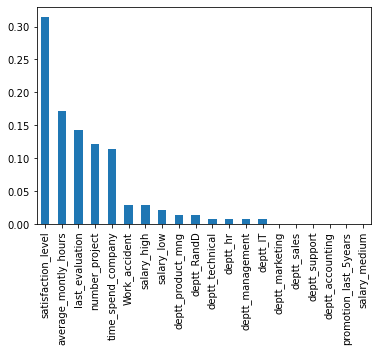

In [184]:
feat_imp.plot(kind='bar')

In [ ]:
!pip install xgboost

In [185]:
from xgboost import XGBClassifier

In [186]:
clf = XGBClassifier(n_estimators=80, random_state=500)

In [187]:
clf.fit(X_train, y_train)

C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:42:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=80, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=500,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [188]:
clf.score(X_test, y_test)

0.985

In [189]:
mod = GridSearchCV(clf, param_grid = {'n_estimators':[60,80,100,120,140,160]})

mod.fit(X_train, y_train)

C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:45:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:45:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:45:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:45:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:45:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:45:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:45:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:46:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:46:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:46:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:46:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:46:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:46:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:46:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:46:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:46:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:46:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:46:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:46:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:46:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:46:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:46:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:46:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:46:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:46:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:46:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:46:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:46:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:46:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:46:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Swastik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:46:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()', n_estimators=80,
                                     n_jobs=8, num_parallel_tree=1,
                                     predictor='auto', random_state=500,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                             

In [190]:
mod.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=140, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=500,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [191]:
clf = XGBClassifier(n_estimators=140, random_state=500)

clf.fit(X_train, y_train)

[16:47:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=140, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=500,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [192]:
clf.score(X_test, y_test)

0.9883333333333333

In [193]:
feat_imp = pd.Series(clf.feature_importances_, index=X.columns.tolist()).sort_values(ascending=False)

feat_imp

satisfaction_level       0.237861
time_spend_company       0.204059
number_project           0.141526
last_evaluation          0.073962
Work_accident            0.044384
salary_high              0.043156
average_montly_hours     0.039332
deptt_IT                 0.024373
salary_low               0.023878
deptt_support            0.022110
deptt_hr                 0.021984
deptt_accounting         0.020219
deptt_technical          0.016814
deptt_sales              0.016316
salary_medium            0.014658
deptt_RandD              0.014343
promotion_last_5years    0.014038
deptt_management         0.011235
deptt_product_mng        0.009842
deptt_marketing          0.005910
dtype: float32

<AxesSubplot:>

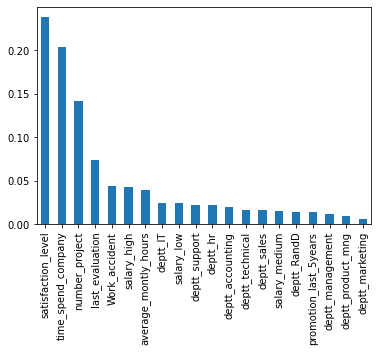

In [194]:
feat_imp.plot(kind='bar')